In [1]:
import numpy as np
import matplotlib.cm as cm
import random
from matplotlib import pyplot as plt

In [23]:
import pandas as pd


In [24]:
def get_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [25]:
def get_membership_coefficient(dist):
    return (1/dist)**(2/(coefficient-1))

In [26]:
def get_average(centers):
    cluster_mean_ax = 0
    cluster_mean_bx = 0
    cluster_mean_ay = 0
    cluster_mean_by = 0
    for index, membership_coefficient in enumerate(membership_coefficients_to_center_1):
        cluster_mean_ax = cluster_mean_ax + (membership_coefficient**coefficient)
        cluster_mean_bx = cluster_mean_bx + (membership_coefficient**coefficient) * dataset[:, 0][index]
        cluster_mean_ay = cluster_mean_ay + (membership_coefficient**coefficient)
        cluster_mean_by = cluster_mean_by + (membership_coefficient**coefficient) * dataset[:, 1][index]
    centers[1] = [cluster_mean_bx/cluster_mean_ax, cluster_mean_by/cluster_mean_ay]

    cluster_mean_ax = 0
    cluster_mean_bx = 0
    cluster_mean_ay = 0
    cluster_mean_by = 0
    for index, membership_coefficient in enumerate(membership_coefficients_to_center_2):
        cluster_mean_ax = cluster_mean_ax + (membership_coefficient ** coefficient)
        cluster_mean_bx = cluster_mean_bx + (membership_coefficient ** coefficient) * dataset[:, 0][index]
        cluster_mean_ay = cluster_mean_ay + (membership_coefficient ** coefficient)
        cluster_mean_by = cluster_mean_by + (membership_coefficient ** coefficient) * dataset[:, 1][index]
    centers[2] = [cluster_mean_bx / cluster_mean_ax, cluster_mean_by / cluster_mean_ay]
    return centers

In [27]:
def show_result():
    for i in centers.keys():
        plt.scatter(*centers[i], color=colors[i])
    for j, f, s in zip(range(len(dataset[:, 0])), membership_coefficients_to_center_1, membership_coefficients_to_center_2):
        if f > s:
            plt.scatter(dataset[:, 0][j], dataset[:, 1][j], color=colors[1])
        else:
            plt.scatter(dataset[:, 0][j], dataset[:, 1][j], color=colors[2])
    plt.show()


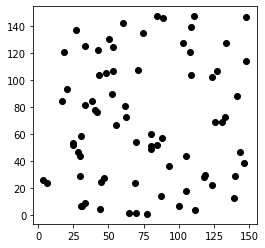

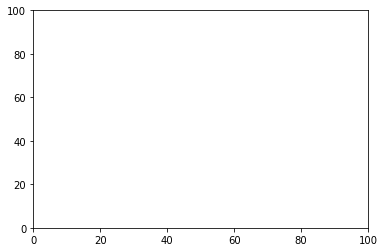

In [33]:
k = 2
coefficient = 0.2
eps = 0.3
np.random.seed(158)
centers = {
    i+1: [np.random.randint(0, 100), np.random.randint(0, 100)]
    for i in range(k)
}
n = 150
dataset = np.array([[np.random.uniform(0, n), np.random.uniform(0, n)] for k in range(n // 2)])
dataset
colors = {1: 'r', 2: 'g', 3: 'b'}
plt.figure(figsize=(4, 4))
plt.scatter(dataset[:, 0], dataset[:, 1], color='k')
plt.show()
clusters = [[] for _ in range(k)]

plt.xlim(0, 100)
plt.ylim(0, 100)

membership_coefficients_to_center_1 = []
membership_coefficients_to_center_2 = []

In [34]:
def fill_clusters():
    global clusters
    clusters = [[] for _ in range(k)]
    distances_to_center_1 = []
    distances_to_center_2 = []
    global membership_coefficients_to_center_1
    global membership_coefficients_to_center_2
    membership_coefficients_to_center_1 = []
    membership_coefficients_to_center_2 = []
    sum = 0

    for i, j in zip(dataset[:, 0], dataset[:, 1]):
        distances_to_center_1.append(get_distance(i, centers[1][0], j, centers[1][1]))
        distances_to_center_2.append(get_distance(i, centers[2][0], j, centers[2][1]))

    for distance_to_center_1, distance_to_center_2 in zip(distances_to_center_1, distances_to_center_2):
        membership_coefficient_to_center_1 = get_membership_coefficient(distance_to_center_1)
        membership_coefficient_to_center_2 = get_membership_coefficient(distance_to_center_2)
        membership_coefficients_to_center_1.append(membership_coefficient_to_center_1/(membership_coefficient_to_center_1+membership_coefficient_to_center_2))
        membership_coefficients_to_center_2.append(membership_coefficient_to_center_2/(membership_coefficient_to_center_1+membership_coefficient_to_center_2))

    for i in range(len(distances_to_center_1)):
        sum = sum + ((distances_to_center_1[i] * membership_coefficients_to_center_1[i]) + (distances_to_center_2[i] * membership_coefficients_to_center_2[i]))

    return sum


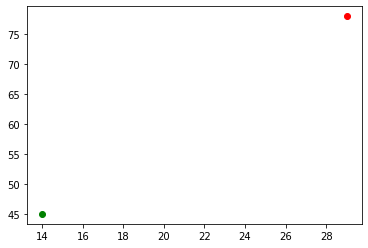

{1: [29, 78], 2: [14, 45]}
{1: [29, 78], 2: [14, 45]}
{1: [75.8823631892256, 65.63466972322709], 2: [76.24588363240592, 72.30047795483823]}
{1: [29, 78], 2: [14, 45]}
0
6038.8184897260635
0.3


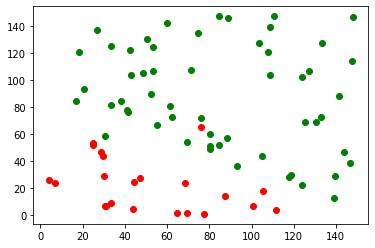

{1: [75.8823631892256, 65.63466972322709], 2: [76.24588363240592, 72.30047795483823]}
{1: [75.8823631892256, 65.63466972322709], 2: [76.24588363240592, 72.30047795483823]}
{1: [75.01126652003073, 70.20459783913608], 2: [75.0580569363119, 68.44213074726729]}
{1: [75.8823631892256, 65.63466972322709], 2: [76.24588363240592, 72.30047795483823]}
6038.8184897260635
4315.786373717028
0.3


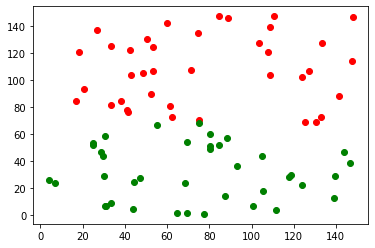

{1: [75.01126652003073, 70.20459783913608], 2: [75.0580569363119, 68.44213074726729]}
{1: [75.01126652003073, 70.20459783913608], 2: [75.0580569363119, 68.44213074726729]}
{1: [75.06055548766267, 69.06802966167362], 2: [75.01571523372306, 69.53585970026153]}
{1: [75.01126652003073, 70.20459783913608], 2: [75.0580569363119, 68.44213074726729]}
4315.786373717028
4286.466370163966
0.3


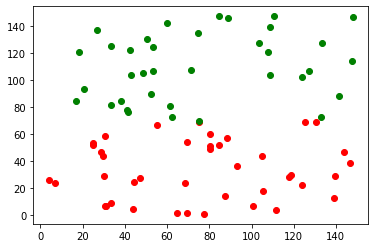

{1: [75.06055548766267, 69.06802966167362], 2: [75.01571523372306, 69.53585970026153]}
{1: [75.06055548766267, 69.06802966167362], 2: [75.01571523372306, 69.53585970026153]}
{1: [75.02850205219825, 69.36300791367658], 2: [75.04805174111, 69.23817827959374]}
{1: [75.06055548766267, 69.06802966167362], 2: [75.01571523372306, 69.53585970026153]}
4286.466370163966
4284.5224746689055
0.3


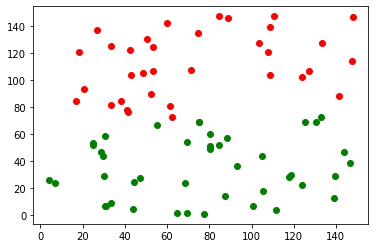

{1: [75.02850205219825, 69.36300791367658], 2: [75.04805174111, 69.23817827959374]}
{1: [75.02850205219825, 69.36300791367658], 2: [75.04805174111, 69.23817827959374]}
{1: [75.04178864365447, 69.28376996079112], 2: [75.03478913984405, 69.3172244037665]}
{1: [75.02850205219825, 69.36300791367658], 2: [75.04805174111, 69.23817827959374]}
4284.5224746689055
4284.381888402153
0.3
Count of iterations:  4


In [35]:
count = 0
sum = 0
show_result()
while(True):
    old_sum = sum
    sum = fill_clusters()
    print(centers)
    old_centers = centers.copy()
    print(old_centers)
    new_centers = get_average(centers).copy()
    print(new_centers)
    centers = new_centers.copy()
    print(old_centers)
    print(old_sum)
    print (sum)
    print(eps)
    if abs(old_sum - sum) < eps:
        print("Count of iterations: ", count)
        break
    show_result()
    count = count + 1